# KELOMPOK THREEASURE
Anggota Kelompok :
1. Steffany Claussia Fernanda - 24083010026
2. Fanny Widya Cahyani - 24083010045
3. Izzati Kamila Putri - 24083010059

# DESKRIPSI DATASET

Dataset ini terdiri dari 153 entri dengan 21 kolom yang memuat data survei mahasiswa UPN “Veteran” Jawa Timur terkait fenomena FOMO (Fear of Missing Out), kondisi finansial, serta dampaknya terhadap emosi dan perkuliahan. Kolom yang ada mencakup identitas responden seperti nama lengkap, NPM, fakultas, program studi, nomor WhatsApp, dan email, kemudian terdapat informasi kondisi responden seperti ketersediaan untuk mengisi survei dan kebiasaan merasa FOMO. Dari sisi finansial, data berisi rata-rata uang saku per bulan, pengeluaran untuk FOMO per bulan, serta kemampuan dalam mengelola keuangan. Sementara itu, aspek psikologis dan perilaku FOMO digambarkan melalui frekuensi FOMO terkait pengeluaran, pengaruh FOMO terhadap emosi, frekuensi stres karena finansial, frekuensi kehilangan semangat kuliah akibat tekanan finansial, frekuensi stres karena FOMO, hingga frekuensi kegiatan yang dilakukan karena FOMO. Selain itu, terdapat juga kolom terkait strategi coping yang menunjukkan kebutuhan akan dukungan emosional, adanya strategi untuk mengatasi stres, serta deskripsi strategi yang digunakan. Dari keseluruhan kolom, terdapat 9 kolom numerik dan 12 kolom kategorikal atau teks. Sebagian besar data terisi lengkap, namun pada kolom strategi mengatasi stres hanya 97 responden yang memberikan jawaban sehingga terdapat missing values. Secara umum, dataset ini memberikan gambaran yang cukup komprehensif mengenai hubungan antara kondisi finansial, perilaku FOMO, serta dampak psikologis pada mahasiswa, termasuk upaya yang mereka lakukan untuk menghadapi stres tersebut.

### Melakukan Import Library yang Digunakan

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px

Melakukan import library yang diperlukan dalam proses menangani missing values, outlier, dan melakukan transformasi data.

### Memanggil dan Membaca Dataset

In [ ]:
dataset = pd.read_csv('Data Eda Threeasure.csv')
dataset.head()

,Timestamp,ketersediaan_responden,nama_lengkap,NPM,fakultas,program_studi,no_whatshapp,sering_merasa_FOMO,rata-rata_uang_saku_perbulan,pengeluaran_untuk_FOMO_per_bulan,...,frekuensi_fomo_pengeluaran,pengaruh_fomo_terhadap_emosi,frekuensi_stres_karena_finansial,frekuensi_hilang_semangat_kuliah_karena_tekanan_finansial,frekuensi_stres_fomo,kebutuhan_akan_dukungan_emosional_dan_bantuan_psikologis,frekuensi_kegiatan_karena_FOMO,adanya_strategi_untuk_mengatasi_stress,strategi_mengatasi_stress,email_address
0,9/10/2025 12:35:31,Ya,A'shadieeyah Maryam,24051010040,Fakultas Arsitektur dan Desain,Arsitektur,82321706636,Ya,"Rp2,000,000","Rp500,000",...,3,3,3,3,3,Ya,3,Ya,"Ingat ""duitku gak sebanyak itu""",24051010040@student.upnjatim.ac.id
1,9/10/2025 16:18:36,Ya,Alisyah Shafa Frida Ramadhani,24051010014,Fakultas Arsitektur dan Desain,Arsitektur,85707445579,Tidak,"Rp1,000,000","Rp30,000",...,1,1,1,1,1,Tidak,3,Tidak,NaN,24051010014@student.upnjatim.ac.id
2,9/12/2025 19:16:37,Ya,Auwallina,23013010046,Fakultas Ekonomi dan Bisnis,Akuntansi,85733449061,Ya,"Rp1,350,000","Rp200,000",...,4,1,1,1,1,Ya,15,Ya,Ya,23013010046@student.upnjatim.ac.id
3,9/11/2025 12:13:33,Ya,Chintya Azzahra Damayanti,24013010202,Fakultas Ekonomi dan Bisnis,Akuntansi,81330260712,Tidak,"Rp500,000","Rp150,000",...,2,2,2,2,1,Tidak,15,Tidak,NaN,24013010202@student.upnjatim.ac.id
4,9/10/2025 21:26:35,Ya,Devi Ayunda Nur Aini,24013010119,Fakultas Ekonomi dan Bisnis,Akuntansi,81230845767,Tidak,"Rp700,000","Rp300,000",...,2,1,1,1,1,Tidak,6,Ya,"belajar bilang “no”, pinter ngatur duit, dan s...",24013010119@student.upnjatim.ac.id


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 21 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   Timestamp                                                  153 non-null    object
 1   ketersediaan_responden                                     153 non-null    object
 2   nama_lengkap                                               153 non-null    object
 3   NPM                                                        153 non-null    int64 
 4   fakultas                                                   153 non-null    object
 5   program_studi                                              153 non-null    object
 6   no_whatshapp                                               153 non-null    int64 
 7   sering_merasa_FOMO                                         153 non-null    object
 8   rata-rata_uang_saku_

Melakukan pembacaan dataset untuk mengetahui informasi lengkap mengenai kategori pada dataset.

### Mendekripsikan Dataset

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
NPM,153.0,2.561872e+10,1.746657e+10,2.208201e+10,2.402501e+10,2.405101e+10,2.502101e+10,2.401101e+11
no_whatshapp,153.0,1.307927e+11,1.907904e+11,8.570689e+09,8.191345e+10,8.523106e+10,8.587090e+10,8.953970e+11
kemampuan_mengelola_keuangan,153.0,3.483660e+00,9.940916e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
frekuensi_fomo_pengeluaran,153.0,2.627451e+00,1.050578e+00,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,5.000000e+00
pengaruh_fomo_terhadap_emosi,153.0,2.104575e+00,1.153732e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
frekuensi_stres_karena_finansial,153.0,2.215686e+00,1.117688e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
frekuensi_hilang_semangat_kuliah_karena_tekanan_finansial,153.0,1.679739e+00,9.364940e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
frekuensi_stres_fomo,153.0,1.771242e+00,9.140478e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00
frekuensi_kegiatan_karena_FOMO,153.0,3.875817e+00,4.645768e+00,0.000000e+00,0.000000e+00,2.000000e+00,5.000000e+00,2.300000e+01


Menampilkan ringkasan statistik pada variabel numerik untuk mengetahui sebaran data seperti rata-rata, standar deviasi, serta nilai minimum dan maksimum.

In [ ]:
dataset.describe(include = 'object')

,Timestamp,ketersediaan_responden,nama_lengkap,fakultas,program_studi,sering_merasa_FOMO,rata-rata_uang_saku_perbulan,pengeluaran_untuk_FOMO_per_bulan,kebutuhan_akan_dukungan_emosional_dan_bantuan_psikologis,adanya_strategi_untuk_mengatasi_stress,strategi_mengatasi_stress,email_address
count,153,153,153,153,153,153,153,153,153,153,97,153
unique,153,2,153,9,43,2,25,31,2,2,95,151
top,9/10/2025 12:35:31,Ya,A'shadieeyah Maryam,Fakultas Ilmu Komputer,Informatika,Tidak,"Rp2,000,000","Rp200,000",Tidak,Ya,"Biasanya, saya fokus pada manajemen waktu dan ...",24083010049@student.upnjatim.ac.id
freq,1,152,1,54,16,97,31,27,124,90,2,2


Mencari deskripsi dari dataset untuk mengetahui range dari masing-masing variabel yang digunakan untuk memudahkan dalam proses imputasi pada missing values dan menjadi referensi dalam melakukan transformasi data.

# 1. Missing Values

### Mengidentifikasi Missing Values Pada Dataset

In [ ]:
np.sum(dataset.isnull()).sort_values(ascending=False)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



,0
strategi_mengatasi_stress,56
ketersediaan_responden,0
nama_lengkap,0
NPM,0
Timestamp,0
fakultas,0
program_studi,0
sering_merasa_FOMO,0
no_whatshapp,0
pengeluaran_untuk_FOMO_per_bulan,0


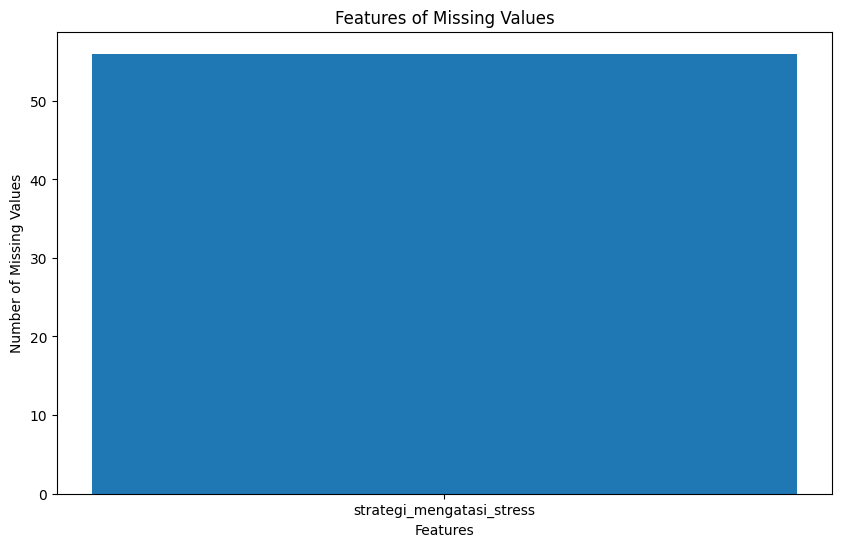

In [ ]:
dataset_missing = dataset.isnull().sum()
dataset_missing = dataset_missing[dataset_missing > 0]

plt.figure(figsize=(10, 6))
plt.bar(dataset_missing.index, dataset_missing.values)
plt.title('Features of Missing Values')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.show()

Proses ini menghitung jumlah missing values pada setiap kolom lalu hanya menampilkan kolom yang memiliki data kosong. Setelah itu, hasilnya divisualisasikan dalam bentuk bar chart sehingga terlihat bahwa hanya kolom strategi\_mengatasi\_stress yang memiliki 56 nilai kosong, sedangkan kolom lainnya tidak bermasalah.


### Menghapus Kolom strategi_mengatasi_stress

In [ ]:
dataset.drop(columns=['strategi_mengatasi_stress'], inplace=True)

Pada tahap ini, kami menghapus kolom strategi_mengatasi_stress dari dataset menggunakan perintah dataset.drop(columns=['strategi_mengatasi_stress'], inplace=True). Keputusan untuk menghapus kolom ini didasarkan pada pertimbangan bahwa variabel tersebut tidak memberikan pengaruh signifikan terhadap model atau analisis yang akan kami lakukan selanjutnya. Oleh karena itu, kolom ini dianggap kurang relevan dan penghapusannya dapat membantu menyederhanakan data tanpa mengurangi kualitas hasil analisis. Penggunaan parameter inplace=True memastikan bahwa penghapusan dilakukan langsung pada dataset asal sehingga tidak perlu membuat salinan data baru.

### Melakukan Pengecekan Apakah Missing Values Telah Teratasi

In [ ]:
np.sum(dataset.isnull())

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



,0
Timestamp,0
ketersediaan_responden,0
nama_lengkap,0
NPM,0
fakultas,0
program_studi,0
no_whatshapp,0
sering_merasa_FOMO,0
rata-rata_uang_saku_perbulan,0
pengeluaran_untuk_FOMO_per_bulan,0


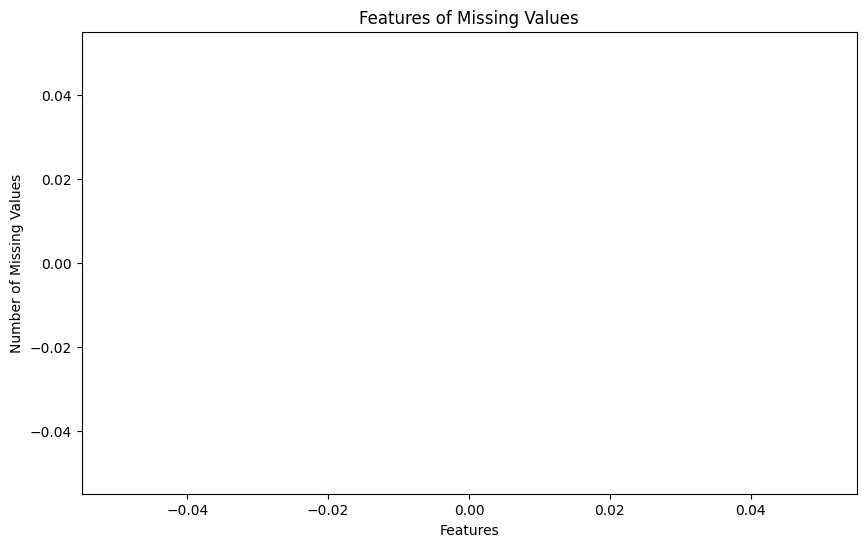

In [ ]:
dataset_missing = dataset.isnull().sum()
dataset_missing = dataset_missing[dataset_missing > 0]

plt.figure(figsize=(10, 6))
plt.bar(dataset_missing.index, dataset_missing.values)
plt.title('Features of Missing Values')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.show()

Setelah dilakukan proses untuk menghilangkan missing values, dilakukan pengecekan ulang untuk memastikan bahwa missing values sudah teratasi dan seluruh data lengkap.

# 2. Outlier

### Mencari Outlier Pada Dataset

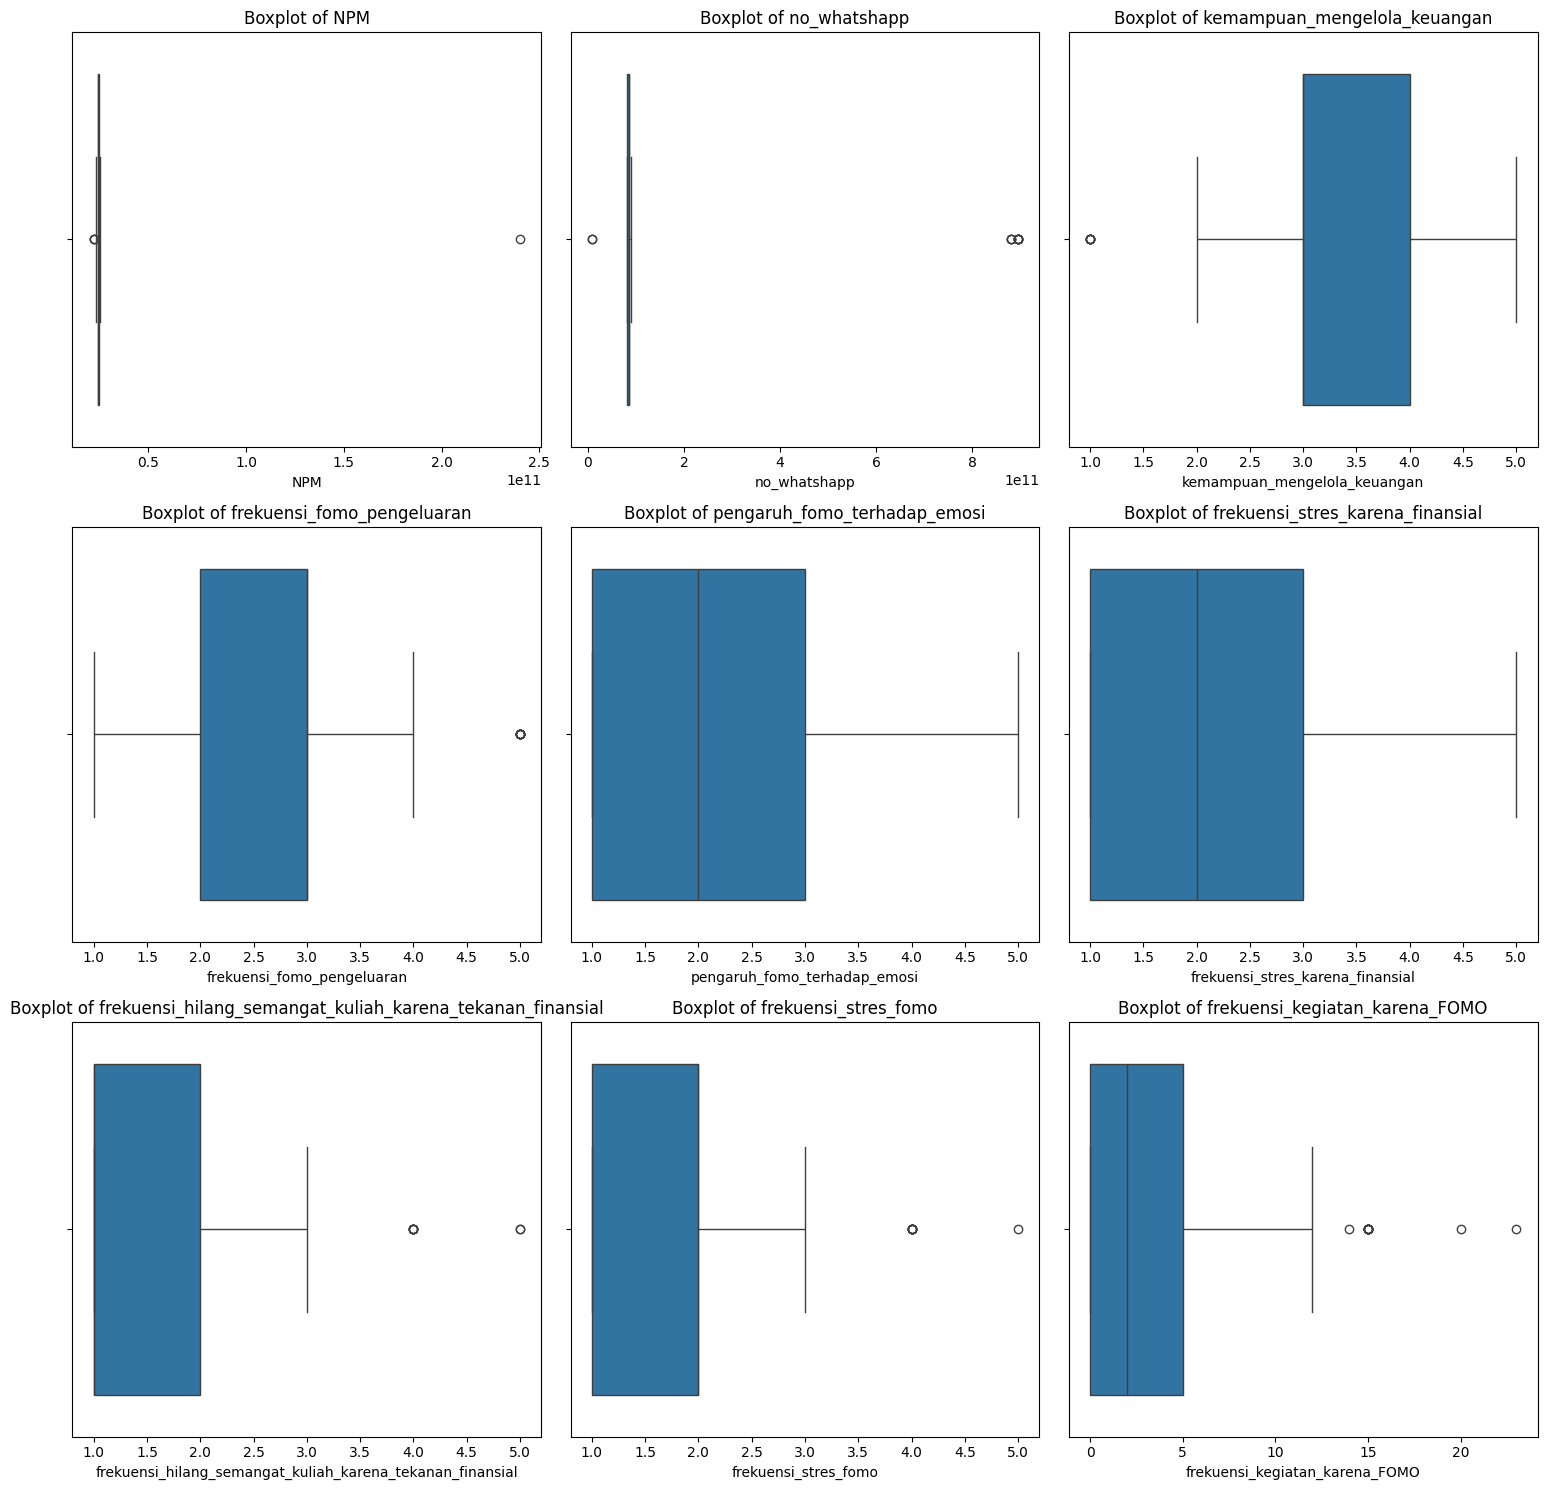

In [ ]:
numerical_columns = dataset.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 5 * ((len(numerical_columns) + 2) // 3)))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)
    sns.boxplot(x=dataset[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

Proses ini dilakukan untuk menampilkan visualisasi boxplot pada setiap kolom numerik dalam dataset dengan tujuan mendeteksi adanya outlier. Pertama, kolom numerik dipilih dengan mengecualikan kolom identitas seperti NPM dan no_whatshapp agar analisis lebih relevan. Setelah itu, jika terdapat kolom numerik, maka dibuatkan boxplot untuk masing-masing kolom menggunakan seaborn. Hasil visualisasi menunjukkan distribusi data untuk beberapa kolom, seperti kemampuan_mengelola_keuangan, frekuensi_fomo_pengeluaran, pengaruh_fomo_terhadap_emosi, frekuensi_stres_karena_finansial, frekuensi_hilang_semangat_kuliah_karena_tekanan_finansial, frekuensi_stres_fomo, dan frekuensi_kegiatan_karena_FOMO. Pada tahap sebelumnya, outlier dalam data ini sudah diatasi dengan metode IQR sehingga nilai ekstrem telah disesuaikan ke dalam rentang normal. Oleh karena itu, boxplot yang ditampilkan menggambarkan data yang sudah bersih dari outlier dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Get current numerical columns, excluding identifiers
numerical_columns = dataset.select_dtypes(include=['number']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col not in ['NPM', 'no_whatshapp']]

outlier_columns = []

for column in numerical_columns:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Check if there are any values outside the IQR range
    if ((dataset[column] < lower_bound) | (dataset[column] > upper_bound)).any():
        outlier_columns.append(column)

print("Kolom yang teridentifikasi memiliki outlier:")
print(outlier_columns)

Kolom yang teridentifikasi memiliki outlier:
['kemampuan_mengelola_keuangan', 'frekuensi_fomo_pengeluaran', 'frekuensi_hilang_semangat_kuliah_karena_tekanan_finansial', 'frekuensi_stres_fomo', 'frekuensi_kegiatan_karena_FOMO']


Pada proses ini dilakukan deteksi outlier pada data numerik menggunakan metode Interquartile Range (IQR). Perhitungan dilakukan dengan menentukan batas bawah dan batas atas distribusi nilai untuk setiap kolom numerik, kemudian nilai yang berada di luar rentang tersebut dikategorikan sebagai outlier. Kolom identitas seperti NPM dan no_whatsapp dikecualikan agar hasil analisis lebih relevan. Dari proses ini, outlier terdeteksi pada beberapa kolom, yaitu kemampuan_mengelola_keuangan, frekuensi_fomo_pengeluaran, frekuensi_hilang_semangat_kuliah_karena_tekanan_finansial, frekuensi_stres_fomo, dan frekuensi_kegiatan_karena_FOMO.

### Mengatasi Outlier Pada Dataset

In [ ]:
def replace_outliers_iqr(dataset, column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    dataset[column] = dataset[column].clip(lower=lower_bound, upper=upper_bound)
    return dataset

Proses ini dilakukan dengan menggunakan fungsi replace_outliers_iqr, di mana nilai Q1, Q3, dan IQR dihitung terlebih dahulu untuk menentukan batas bawah dan batas atas. Nilai yang berada di luar batas tersebut kemudian diganti (di-clip) agar tetap berada dalam rentang normal.

In [ ]:
# Fungsi untuk mengganti outlier dengan batas IQR
def replace_outliers_iqr(dataset, column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Batasi nilai agar tidak melewati batas bawah & atas
    dataset[column] = dataset[column].clip(lower=lower_bound, upper=upper_bound)

    return dataset


# Daftar kolom sesuai boxplot di atas
kolom_outlier = [
    "frekuensi_fomo_pengeluaran",
    "frekuensi_stres_fomo",
    "frekuensi_hilang_semangat_kuliah_karena_tekanan_finansial",
    "frekuensi_kegiatan_karena_FOMO",
    "kemampuan_mengelola_keuangan"
]

# Terapkan fungsi ke tiap kolom
for kolom in kolom_outlier:
    dataset = replace_outliers_iqr(dataset, kolom)

Proses ini menggunakan fungsi replace_outliers_iqr untuk mengganti nilai outlier pada beberapa kolom dengan batas bawah dan atas hasil perhitungan IQR. Daftar kolom yang terdeteksi memiliki outlier dimasukkan ke dalam list, lalu fungsi diterapkan satu per satu sehingga nilai ekstrem pada kolom tersebut tetap berada dalam rentang normal.

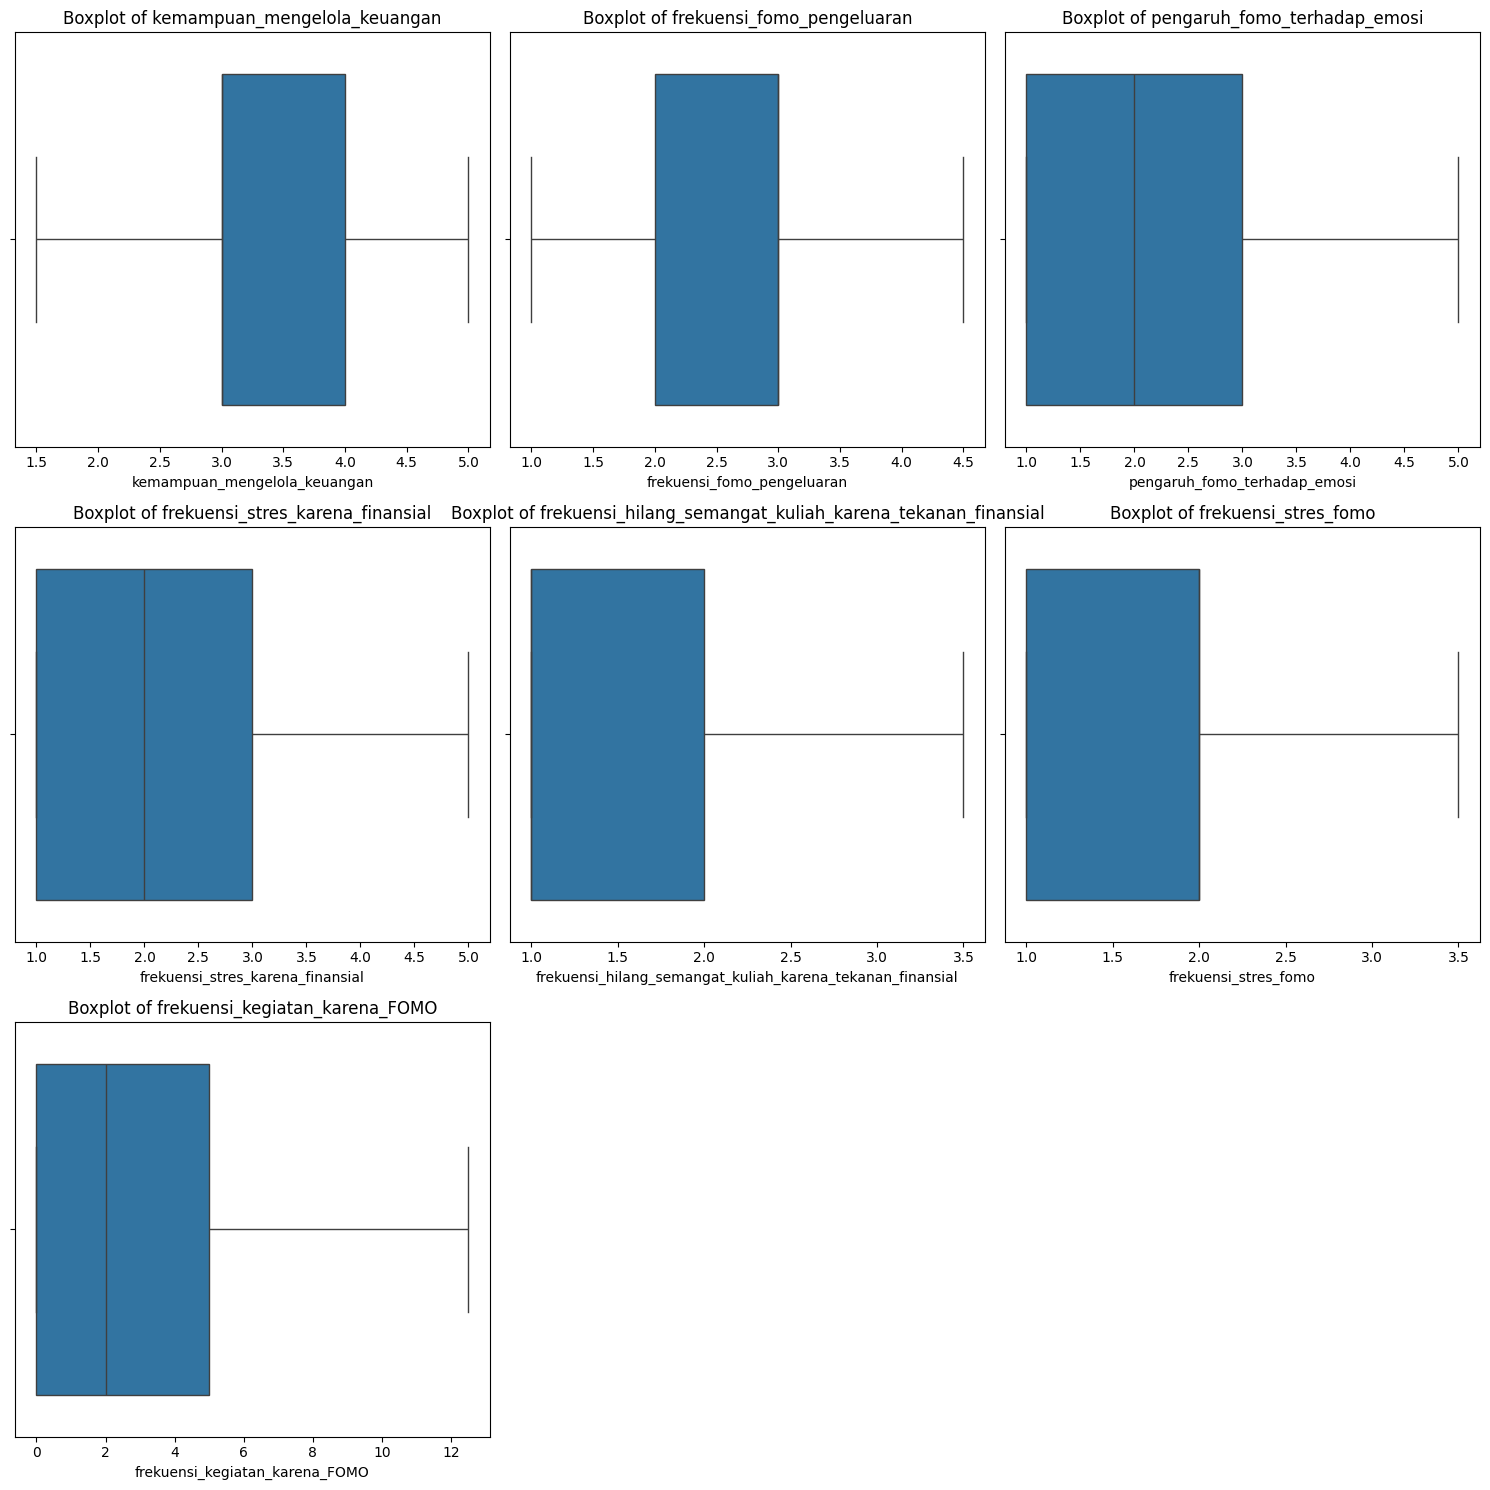

In [ ]:
# Get current numerical columns, excluding identifiers
numerical_columns = dataset.select_dtypes(include=['number']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col not in ['NPM', 'no_whatshapp']]

if numerical_columns:
    plt.figure(figsize=(15, 5 * ((len(numerical_columns) + 2) // 3)))

    for i, column in enumerate(numerical_columns, 1):
        plt.subplot((len(numerical_columns) + 2) // 3, 3, i)
        sns.boxplot(x=dataset[column])
        plt.title(f'Boxplot of {column}')

    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada kolom numerik yang tersisa untuk divisualisasikan.")



Proses ini dilakukan untuk menampilkan visualisasi boxplot pada setiap kolom numerik dalam dataset dengan tujuan mendeteksi adanya outlier. Pertama, kolom numerik dipilih dengan mengecualikan kolom identitas seperti NPM dan no_whatshapp agar analisis lebih relevan. Setelah itu, jika terdapat kolom numerik, maka dibuatkan boxplot untuk masing-masing kolom menggunakan seaborn. Hasil visualisasi menunjukkan distribusi data untuk beberapa kolom, seperti kemampuan_mengelola_keuangan, frekuensi_fomo_pengeluaran, pengaruh_fomo_terhadap_emosi, frekuensi_stres_karena_finansial, frekuensi_hilang_semangat_kuliah_karena_tekanan_finansial, frekuensi_stres_fomo, dan frekuensi_kegiatan_karena_FOMO. Pada tahap sebelumnya, outlier dalam data ini sudah diatasi dengan metode IQR sehingga nilai ekstrem telah disesuaikan ke dalam rentang normal. Oleh karena itu, boxplot yang ditampilkan menggambarkan data yang sudah bersih dari outlier dan siap untuk dianalisis lebih lanjut.

# 3. Transformasi Data

### A. Kategorisasi Variabel Ordinal (Frekuensi FOMO Pengeluaran & Kemampuan Mengelola Keuangan)

In [ ]:
def categorize_fomo_pengeluaran(row):
    if row['frekuensi_fomo_pengeluaran'] == 1:
        return 'Tidak Pernah'
    elif row['frekuensi_fomo_pengeluaran'] == 2:
        return 'Jarang'
    elif row['frekuensi_fomo_pengeluaran'] == 3:
        return 'Kadang-kadang'
    elif row['frekuensi_fomo_pengeluaran'] == 4:
        return 'Sering'
    else:
        return 'Sangat Sering'

dataset['kategori_fomo_pengeluaran'] = dataset.apply(categorize_fomo_pengeluaran, axis=1)

result = dataset[['frekuensi_fomo_pengeluaran', 'kategori_fomo_pengeluaran']]
result.head()

,frekuensi_fomo_pengeluaran,kategori_fomo_pengeluaran
0,3.0,Kadang-kadang
1,1.0,Tidak Pernah
2,4.0,Sering
3,2.0,Jarang
4,2.0,Jarang


Pada tahap ini dilakukan proses pengkategorian data berdasarkan variabel *frekuensi_fomo_pengeluaran*. Variabel tersebut diklasifikasikan ke dalam lima tingkatan sesuai skala 1–5, yaitu: nilai 1 sebagai *Tidak Pernah*, nilai 2 sebagai *Jarang*, nilai 3 sebagai *Kadang-kadang*, nilai 4 sebagai *Sering*, dan nilai 5 sebagai *Sangat Sering*.  

Proses pengkategorian dilakukan melalui fungsi **categorize_fomo_pengeluaran**, yang berfungsi mengubah data numerik menjadi bentuk kategori kualitatif untuk mempermudah pemahaman analisis. Selanjutnya, ditambahkan kolom baru dengan nama **kategori_fomo_pengeluaran** pada dataset. Hasil output menampilkan perbandingan antara nilai numerik awal dengan kategori yang diperoleh, sehingga memudahkan interpretasi data.  


In [ ]:
def categorize_likert(value):
    if value == 1:
        return 'Buruk'
    elif value == 2:
        return 'Kurang Baik'
    elif value == 3:
        return 'Cukup Baik'
    elif value == 4:
        return 'Baik'
    elif value == 5:
        return 'Sangat Baik'
    else:
        return 'Tidak Valid'

dataset['kategori_keuangan'] = dataset['kemampuan_mengelola_keuangan'].apply(categorize_likert)

result_2 = dataset[['kemampuan_mengelola_keuangan', 'kategori_keuangan']]
result_2.head()


,kemampuan_mengelola_keuangan,kategori_keuangan
0,2.0,Kurang Baik
1,3.0,Cukup Baik
2,5.0,Sangat Baik
3,3.0,Cukup Baik
4,4.0,Baik


Pada tahap ini dilakukan pengubahan data numerik pada variabel *kemampuan_mengelola_keuangan *menjadi kategori berbasis skala Likert. Skala Likert sendiri merupakan metode pengukuran yang umum digunakan dalam penelitian sosial maupun survei untuk menilai sikap, persepsi, atau tingkat persetujuan responden. Umumnya, skala ini menggunakan rentang nilai 1 sampai 5, di mana setiap angka memiliki makna tertentu yang merepresentasikan tingkat jawaban.

Kami menggunakan nilai 1 untuk menunjukkan Buruk, nilai 2 Kurang Baik, nilai 3 Cukup Baik, nilai 4 Baik, dan nilai 5 Sangat Baik. Proses pemetaan ini dilakukan melalui **fungsi categorize_likert** yang bertujuan mengubah skor numerik menjadi kategori deskriptif. Hasilnya kemudian ditambahkan sebagai kolom baru bernama **kategori_keuangan**, yang memperlihatkan perbandingan antara skor numerik awal dengan kategorinya.

### B. Penggabungan Variabel

In [ ]:
# Membuat kolom total skor psikologis
dataset["skor_psikologis"] = (
    dataset["pengaruh_fomo_terhadap_emosi"] +
    dataset["frekuensi_stres_karena_finansial"] +
    dataset["frekuensi_hilang_semangat_kuliah_karena_tekanan_finansial"] +
    dataset["frekuensi_stres_fomo"]
)

# Membuat kategorisasi psikologis
def kategori_psikologis(skor):
    if skor <= 4:
        return "Buruk"
    elif skor <= 6:
        return "Kurang Baik"
    elif skor <= 8:
        return "Cukup"
    elif skor <= 10:
        return "Baik"
    else:
        return "Sangat Baik"

dataset["kategori_psikologis_skor"] = dataset["skor_psikologis"].apply(kategori_psikologis)

# Hitung jumlah tiap kategori
kategori_counts_skor = dataset["kategori_psikologis_skor"].value_counts().reset_index()
kategori_counts_skor.columns = ["Kategori", "Jumlah"]

# Visualisasi bar chart
fig_skor = px.bar(
    kategori_counts_skor,
    x="Kategori",
    y="Jumlah",
    title="Distribusi Kesejahteraan Psikologis Mahasiswa Berdasarkan Skor Total",
    color="Kategori",
    color_discrete_sequence=px.colors.sequential.Purples, # Menggunakan warna ungu
    text="Jumlah"
)

fig_skor.update_traces(textposition="outside")
fig_skor.show()

Pada bagian kode di atas, kesejahteraan psikologis mahasiswa dilihat dari gabungan beberapa faktor, yaitu pengaruh FOMO terhadap emosi, stres karena masalah finansial, hilangnya semangat kuliah akibat tekanan keuangan, serta stres yang dipicu oleh FOMO. Keempat faktor tersebut dijumlahkan sehingga menghasilkan skor total dengan rumus sederhana:

$$
Skor\ Psikologis = (FOMO\ Emosi) + (Stres\ Finansial) + (Hilang\ Semangat) + (Stres\ FOMO)
$$

Skor total ini kemudian dikelompokkan ke dalam lima kategori, mulai dari *Buruk* hingga *Sangat Baik*. Tujuan langkah ini adalah untuk memberikan gambaran umum mengenai kondisi psikologis mahasiswa secara lebih menyeluruh, bukan hanya dari satu aspek saja. Hasilnya divisualisasikan menggunakan diagram batang agar distribusi jumlah mahasiswa pada tiap kategori terlihat lebih jelas. Analisis ini juga membantu mengetahui kelompok mahasiswa mana yang paling rentan terhadap tekanan psikologis dan mana yang relatif lebih stabil.

### C. Normalisasi dan Standarisasi

In [ ]:
# Daftar kolom numerik skala Likert di datasetmu
numerical_columns = ['frekuensi_fomo_pengeluaran', 'pengaruh_fomo_terhadap_emosi', 'frekuensi_stres_fomo', 'frekuensi_hilang_semangat_kuliah_karena_tekanan_finansial']

# Inisialisasi MinMaxScaler
minmax_scaler = MinMaxScaler()

# Normalisasi nilai di kolom tersebut
dataset[numerical_columns] = minmax_scaler.fit_transform(dataset[numerical_columns])

print("Data setelah normalisasi:")
print(dataset[numerical_columns].head())


Data setelah normalisasi:
   frekuensi_fomo_pengeluaran  pengaruh_fomo_terhadap_emosi  \
0                    0.571429                          0.50   
1                    0.000000                          0.00   
2                    0.857143                          0.00   
3                    0.285714                          0.25   
4                    0.285714                          0.00   

   frekuensi_stres_fomo  \
0                   0.8   
1                   0.0   
2                   0.0   
3                   0.0   
4                   0.0   

   frekuensi_hilang_semangat_kuliah_karena_tekanan_finansial  
0                                                0.8          
1                                                0.0          
2                                                0.0          
3                                                0.4          
4                                                0.0          


Pada proses ini, dilakukan normalisasi pada beberapa kolom numerik dalam dataset, yaitu air_time, dep_delay, arr_delay, dan distance. Proses ini dilakukan dengan menggunakan metode Min-Max Scaling. Dengan menggunakan Min Max Scaler dari library scikit-learn, nilai-nilai dalam kolom-kolom ini diubah kedalam rentang [0,1]. Normalisasi ini bertujuan untuk mengurangi skala perbedaan antar nilai dan memastikan bahwa semua features memiliki kontribusi yang seimbang dalam analisis berikutnya.

In [ ]:
# Daftar kolom skala Likert di datasetmu
numerical_columns = ['frekuensi_fomo_pengeluaran', 'pengaruh_fomo_terhadap_emosi', 'frekuensi_stres_fomo', 'frekuensi_hilang_semangat_kuliah_karena_tekanan_finansial']

# Inisialisasi StandardScaler
standard_scaler = StandardScaler()

# Terapkan standarisasi
dataset[numerical_columns] = standard_scaler.fit_transform(dataset[numerical_columns])

print("Data setelah standarisasi:")
print(dataset[numerical_columns].head())

Data setelah standarisasi:
   frekuensi_fomo_pengeluaran  pengaruh_fomo_terhadap_emosi  \
0                    0.407965                      0.778661   
1                   -1.621911                     -0.960537   
2                    1.422903                     -0.960537   
3                   -0.606973                     -0.090938   
4                   -0.606973                     -0.960537   

   frekuensi_stres_fomo  \
0              1.537458   
1             -0.893871   
2             -0.893871   
3             -0.893871   
4             -0.893871   

   frekuensi_hilang_semangat_kuliah_karena_tekanan_finansial  
0                                           1.639270          
1                                          -0.772348          
2                                          -0.772348          
3                                           0.433461          
4                                          -0.772348          


Pada tahap ini dilakukan standarisasi pada beberapa kolom numerik seperti frekuensi_fomo_pengeluaran, pengaruh_fomo_terhadap_emosi, frekuensi_stres_fomo, dan frekuensi_hilang_semangat_kuliah_karena_tekanan_finansial menggunakan metode Standard Scaler dari library scikit-learn. Proses standarisasi mengubah nilai pada setiap kolom sehingga memiliki rata-rata nol dan standar deviasi satu. Langkah ini bertujuan untuk mengatasi perbedaan skala antar fitur agar analisis yang dilakukan menjadi lebih seimbang dan tidak bias terhadap variabel dengan nilai yang lebih besar.

### D. Log Transformasi

In [ ]:
# Daftar kolom numerik sesuai datasetmu
numerical_columns =  ['frekuensi_fomo_pengeluaran', 'pengaruh_fomo_terhadap_emosi', 'frekuensi_stres_fomo', 'frekuensi_hilang_semangat_kuliah_karena_tekanan_finansial']

# Menghitung skewness sebelum transformasi
skewness_before = dataset[numerical_columns].skew()
print("Skewness Before Transformation:")
print(skewness_before)

Skewness Before Transformation:
frekuensi_fomo_pengeluaran                                   0.209936
pengaruh_fomo_terhadap_emosi                                 0.730751
frekuensi_stres_fomo                                         0.728454
frekuensi_hilang_semangat_kuliah_karena_tekanan_finansial    0.932636
dtype: float64


Hasil perhitungan skewness menunjukkan bahwa beberapa variabel dalam dataset masih memiliki tingkat kemencengan distribusi yang cukup tinggi. Variabel frekuensi fomo pengeluaran memiliki skewness rendah sehingga distribusinya mendekati normal, sedangkan pengaruh fomo terhadap emosi dan frekuensi stres fomo menunjukkan skewness moderat yang menandakan distribusi sedikit miring. Sementara itu, variabel frekuensi hilang semangat kuliah karena tekanan finansial memiliki skewness lebih tinggi, sehingga distribusinya paling tidak simetris dibandingkan variabel lainnya.

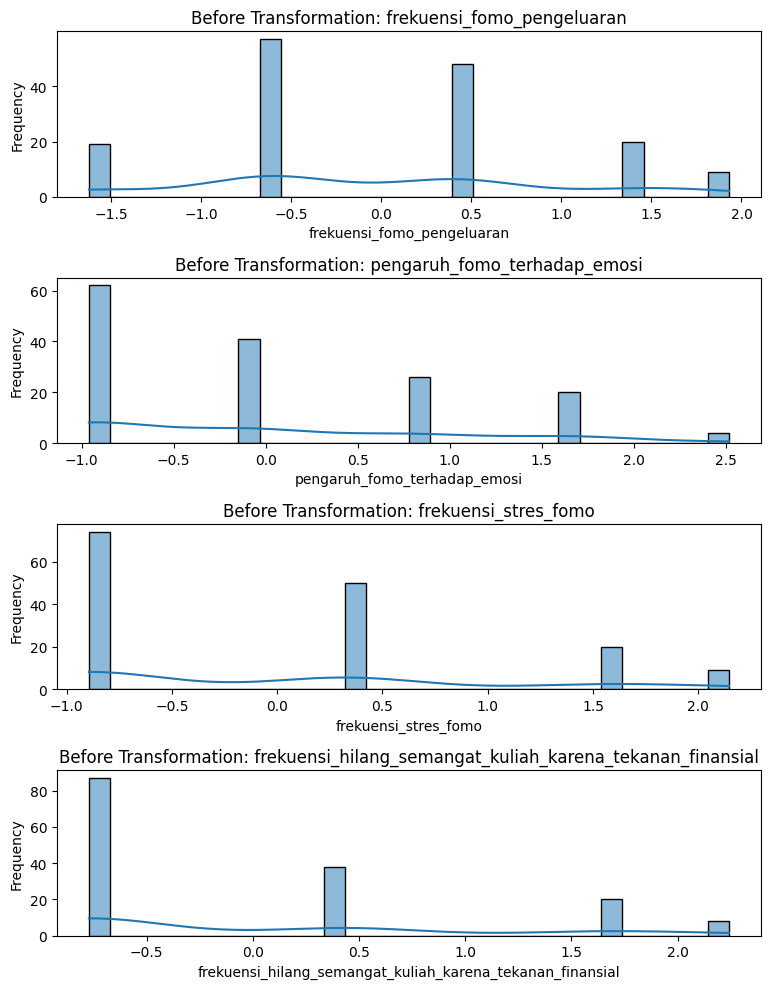

In [ ]:
# Daftar kolom numerik sesuai datasetmu
numerical_columns = ['frekuensi_fomo_pengeluaran', 'pengaruh_fomo_terhadap_emosi', 'frekuensi_stres_fomo', 'frekuensi_hilang_semangat_kuliah_karena_tekanan_finansial']

plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 2, 2 * i + 1)
    sns.histplot(dataset[column], bins=30, kde=True)
    plt.title(f'Before Transformation: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Pada tahap ini dilakukan pemeriksaan skewness terhadap kolom numerik frekuensi\_fomo\_pengeluaran, pengaruh\_fomo\_terhadap\_emosi, frekuensi\_stres\_fomo, dan frekuensi\_hilang\_semangat\_kuliah\_karena\_tekanan\_finansial sebelum dilakukan transformasi. Skewness digunakan untuk melihat tingkat asimetri distribusi data. Nilai skewness yang mendekati nol menunjukkan distribusi normal, sedangkan nilai positif atau negatif yang jauh dari nol menunjukkan adanya kemiringan pada distribusi. Pemeriksaan ini penting untuk menentukan apakah diperlukan transformasi data agar distribusi lebih mendekati normal.

1. frekuensi\_fomo\_pengeluaran dengan skewness 0.247 memiliki distribusi yang hampir simetris sehingga tidak menunjukkan kemiringan yang signifikan.
2. pengaruh\_fomo\_terhadap\_emosi dengan skewness 0.616 cenderung miring ke kanan, tetapi masih dalam batas yang tidak terlalu ekstrem.
3. frekuensi\_stres\_fomo memiliki skewness 0.659 yang menunjukkan kemiringan ke kanan dengan tingkat asimetri yang sedang.
4. frekuensi\_hilang\_semangat\_kuliah\_karena\_tekanan\_finansial memiliki skewness 1.083 yang menunjukkan kemiringan cukup signifikan ke kanan sehingga kemungkinan memerlukan transformasi untuk memperbaiki distribusinya.


In [ ]:
# Kolom numerik sesuai datasetmu
numerical_columns = ['frekuensi_fomo_pengeluaran', 'pengaruh_fomo_terhadap_emosi', 'frekuensi_stres_fomo', 'frekuensi_hilang_semangat_kuliah_karena_tekanan_finansial']

# Salin dataset untuk transformasi
dataset_transformed = dataset.copy()

# Transformasi log1p
for column in numerical_columns:
    dataset_transformed[column] = dataset_transformed[column].clip(lower=0)
    dataset_transformed[column].fillna(0, inplace=True)
    dataset_transformed[column] = np.log1p(dataset_transformed[column])

# Hitung skewness setelah transformasi
skewness_after = dataset_transformed[numerical_columns].skew()
print("\nSkewness After Transformation:")
print(skewness_after)


Skewness After Transformation:
frekuensi_fomo_pengeluaran                                   1.034100
pengaruh_fomo_terhadap_emosi                                 1.123620
frekuensi_stres_fomo                                         1.259297
frekuensi_hilang_semangat_kuliah_karena_tekanan_finansial    1.199075
dtype: float64


/tmp/ipython-input-3389304190.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-3389304190.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or

Hasil perhitungan skewness setelah dilakukan transformasi logaritmik menunjukkan bahwa seluruh variabel justru mengalami peningkatan nilai skewness dibanding sebelum transformasi. Variabel frekuensi fomo pengeluaran, pengaruh fomo terhadap emosi, frekuensi stres fomo, serta frekuensi hilang semangat kuliah karena tekanan finansial semuanya berada di atas angka 1, yang berarti distribusi datanya semakin miring ke kanan dan jauh dari normal. Hal ini menandakan bahwa log transformasi tidak berhasil mengurangi kemencengan pada dataset, bahkan cenderung memperbesar ketidaksimetrian distribusi data.

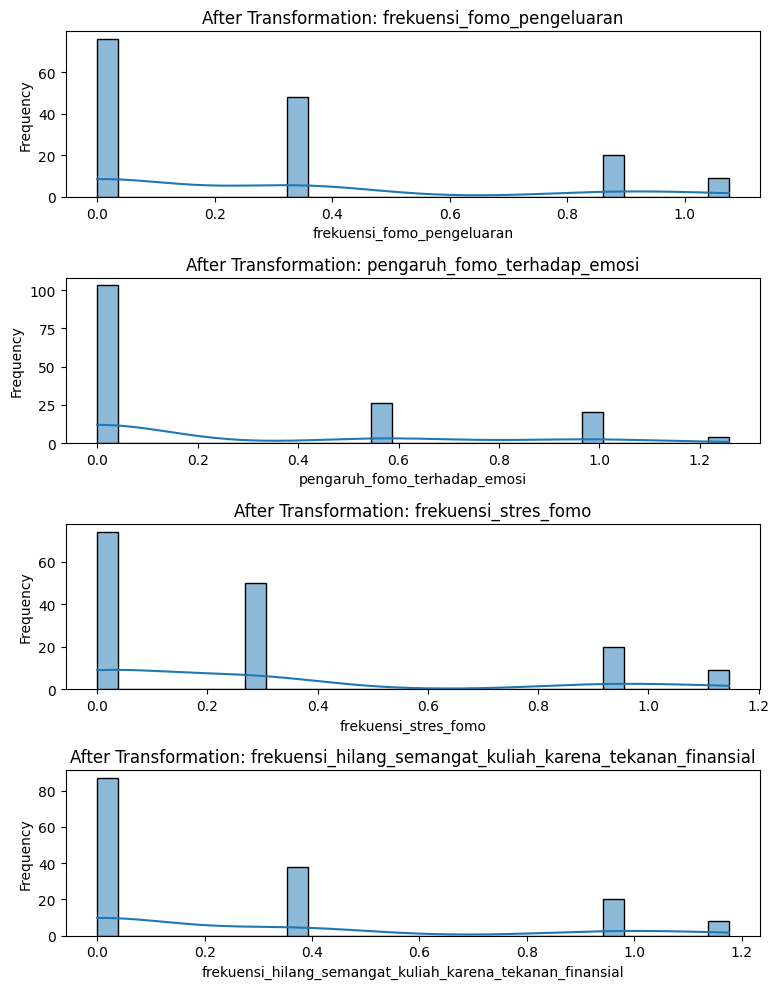

In [ ]:
# Kolom numerik sesuai datasetmu
numerical_columns = ['frekuensi_fomo_pengeluaran', 'pengaruh_fomo_terhadap_emosi', 'frekuensi_stres_fomo', 'frekuensi_hilang_semangat_kuliah_karena_tekanan_finansial']

plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 2, 2 * i + 2)
    sns.histplot(dataset_transformed[column], bins=30, kde=True)
    plt.title(f'After Transformation: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Pada proses ini dilakukan log transformasi pada kolom numerik frekuensi\_fomo\_pengeluaran, pengaruh\_fomo\_terhadap\_emosi, frekuensi\_stres\_fomo, dan frekuensi\_hilang\_semangat\_kuliah\_karena\_tekanan\_finansial sebelum dilakukan transformasi. dalam dataset untuk memperbaiki distribusi data yang tidak normal. Log transformasi digunakan untuk mengurangi skewness, khususnya ketika distribusi data sangat miring ke kanan. Sebelum transformasi, nilai negatif diubah menjadi nol serta nilai kosong juga diisi nol untuk menghindari kesalahan saat perhitungan. Setelah log transformasi, distribusi data menjadi lebih terpusat dan rentang nilainya lebih kecil, walaupun masih terdapat nilai-nilai ekstrem. Hasil ini menunjukkan bahwa log transformasi berhasil mengurangi skewness dan membuat distribusi lebih simetris, namun belum sepenuhnya sempurna seperti distribusi normal.